# Data wrangling project 

By Abdelrahman A ESMAT

# importing packages 

In [282]:
import requests as rq
import pandas as pd 
import json 
import tweepy
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy import stats
%matplotlib inline

# data gathering 
In the next few cells we begin our data gathering process 

## Loading on hand files 

To load files on hand we will use read_csv command

In [283]:
arch=pd.read_csv("twitter-archive-enhanced.csv")

## Downloading and loading files programmatically

Now we use request library to programmatically download the prediction data set

In [284]:
r=rq.get(" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
if not os.path.isfile("image_predictions.tsv"):    
    with open ("image_predictions.tsv","wb") as f:
        f.write(r.content)
prd = pd.read_csv("image_predictions.tsv",sep="\t")

## Loading information from the JSON file

In the next few cells we will load information from the JSON file into a dataframe for later use ,  using the json library and with statement

In [285]:
rates=pd.DataFrame(columns=['ID','retweets','like','followers'])
rate={'ID':0,'retweets':0,'like':0,'followers':0}

In [286]:
with open("tweet-json.txt") as f:
    for line in f.readlines():
        data = json.loads(line)
        rate['ID']=data['id']
        rate['retweets']=data['retweet_count']
        rate['like']=data['favorite_count']
        rate['followers']=data['user']['followers_count']
        rates=rates.append(rate,ignore_index=True)

# Data Assessing

## Data completness 

First we search for completness issue , including duplicates and missing data 

In [287]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Our first problem presents itself, there are 2356 tweet but there are only 2297 expanded urls, there are 59 urls missing 

In [288]:
prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


our second problem is there are 2356 tweets in the enhanced archives but only 2075 tweets in the prediction dataframe , there are 281 tweets missing

Now it's time for a visual assessement 

In [289]:
arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
207,852553447878664193,NaN,NaN,2017-04-13 16:05:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jarod. He likes having his belly brush...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,None,None,None,None
2281,667369227918143488,NaN,NaN,2015-11-19 15:49:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a neat pup. Very white. Cool shad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667369227...,10,10,None,None,None,None,None
1848,675798442703122432,NaN,NaN,2015-12-12 22:04:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He just touched a boob for the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675798442...,10,10,Bernie,None,None,None,None
2227,668268907921326080,NaN,NaN,2015-11-22 03:24:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Azerbaijani Buttermilk named G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668268907...,10,10,None,None,None,None,None
520,810254108431155201,NaN,NaN,2016-12-17 22:43:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Gus. He likes to be close to you, whic...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/810254108...,12,10,Gus,None,None,None,None


Looks like there are missing dog names, Index 2294 is called None , this is a third completness issue

In [290]:
arch["name"].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Jimbo          1
Billy          1
Tater          1
Scruffers      1
Rey            1
Name: name, Length: 957, dtype: int64

Now it's time to search for duplicates , from a the visual assessement it seems like there are 2 columns that can't allow duplicates , tweet_id and expanded_urls. So we're going to check them

In [291]:
arch['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [292]:
arch['expanded_urls'].duplicated().value_counts()

False    2219
True      137
Name: expanded_urls, dtype: int64

Looks like we found our 4th issue, there are duplicates in (expanded_urls)

## Data validity

first step was to inspect the data set visually in excel , where several issues were found

First issue were the retweeted and replies columns , which shouldn't be included according to the project details

second issue was the tweets where the denominator was more than 10 as demonstrated below

In [293]:
arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

According to project details, a denominator should be 10 

Third problem, according to the archives info , we notice that the data type of the "timestamp" columns is object rather than date time 

## Data accuracy 

Another issue discovered by visual assessement and confirmed programmatically is the numerator values

In [294]:
arch["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Some numerators are clearly a mistake like 1776

Another accuracy issue is dog names being generic english words , like a or an

In [295]:
arch["name"].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Jimbo          1
Billy          1
Tater          1
Scruffers      1
Rey            1
Name: name, Length: 957, dtype: int64

## Data ambuigity

While the source columns doesn't have issues pretaining to our four dimensions , it's ambigious in the sense that there no information that be easily extracted from it in its current form.

## Data Tidiness 

First tideness issue is the 4 dog types columns, it's one variable taking 4 columns instead of 1

Second issue is the irrelevant retweets and replies columns which will be empty after removing the retweets and replies, those columns should be removed 

Third and last issue is that all the 3 datasets should be combined since they all describe the same observational unit. A tweet

# Data cleaning

## Clean the data set : Quality 

### Completness issues

#### issue #1

##### define

the first issue is the missing tweets in the image predection data set , it's either because the images are missing in those tweets or the tweet's images were not processed. However since we don't have access to the algorithm and the dog type is essential to our analysis the only thing we can do is to drop the entries present in the archives but don't have a record in the prediction data set 

##### code

In [296]:
set1=set(arch["tweet_id"])
set2=set(prd["tweet_id"])
set3=set1-set2
miss=list(set3)
clean=arch
for iid in miss:
    clean.drop(arch.index[arch['tweet_id']==iid],inplace=True)
clean.reset_index(drop=True,inplace=True)

##### test

after inspection, both the main archive dataframe and the prediction dataframe have the same column 

In [297]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

#### issue #2 and #3

##### define

The second and third completness was the missing URLs and the duplicates, this may be caused by the fact that reply or retweets don't have expanded urls , however the numbers didn't add up. Fortunately we didn't have to worry about it very much, as the problem was solved after solving the first completness issue.

##### test

In [298]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

In [299]:
arch['expanded_urls'].duplicated().value_counts()

False    2075
Name: expanded_urls, dtype: int64

#### issue #4

The fourth completness problem , perhaps the most challenging is the missing dog names, this problem will be discussed and handled later

### Validity issues

##### define

#### issue #1

##### define

the date format is object and not date time , this will render the date useless in analysis, we will convert the type 

##### code

first we're going to remove the +0000

In [300]:
for i in range(2075):
    new=clean.loc[i,'timestamp'].split("+")[0]
    clean.loc[i,'timestamp']=new

then convert it to date_time type

In [301]:
clean.loc[:,'timestamp']=pd.to_datetime(clean['timestamp'])

##### test

In [302]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2075 non-null   int64         
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   2075 non-null   datetime64[ns]
 4   source                      2075 non-null   object        
 5   text                        2075 non-null   object        
 6   retweeted_status_id         81 non-null     float64       
 7   retweeted_status_user_id    81 non-null     float64       
 8   retweeted_status_timestamp  81 non-null     object        
 9   expanded_urls               2075 non-null   object        
 10  rating_numerator            2075 non-null   int64         
 11  rating_denominator          2075 non-null   int64       

#### issue #2

##### define

We are only concerned with orignial tweets so we have to remove any replies or retweets

##### code

first we select the not null rows

In [303]:
boole1=pd.notnull(clean['retweeted_status_id'])
lst1=clean[boole1]['tweet_id']
boole2=pd.notnull(clean['in_reply_to_status_id'])
lst2=clean[boole2]['tweet_id']

then we remove the ID's and do the same for replies

In [304]:
for iid in lst1:
    clean.drop(arch.index[arch['tweet_id']==iid],inplace=True)
for iid in lst2:
    clean.drop(arch.index[arch['tweet_id']==iid],inplace=True)

then we remove all the columns and reset the index

In [305]:
clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)
clean.reset_index(drop=True,inplace=True)

##### test

In [306]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   doggo               1971 non-null   object        
 9   floofer             1971 non-null   object        
 10  pupper              1971 non-null   object        
 11  puppo               1971 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 184.9+ KB


#### issue #3

##### define 

it's agreed upon that denominator should be 10 , however 17 entries didn't follow this criteria , since it's a small number we can easily inspect the text of these tweets and correct if needed manually

In [307]:
clean['rating_denominator'].value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

##### code

In [308]:
index=[]
for i in clean.loc[clean['rating_denominator'] != 10]['text']:
    print(clean.loc[clean['text'] == i]['tweet_id'])
    print("\n")
    print(i)
    print("-----------------")
    index.append(clean.index[clean['text']==i][0])

320    820690176645140481
Name: tweet_id, dtype: int64


The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
-----------------
382    810984652412424192
Name: tweet_id, dtype: int64


Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
-----------------
658    758467244762497024
Name: tweet_id, dtype: int64


Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
-----------------
794    740373189193256964
Name: tweet_id, dtype: int64


After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
-----------------
842    731156023742988288
Name: tweet_id, dtype: int64


Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
-----------------
884    72297458

After visual inspection , the following indexes had their ratings wrong , the rest is intentionally above 10 or doesn't have a rating at all, we will have to drop them so they don't ruin our analysis later 

index 794 : 14/10

index 884 : 13/10   

index 918 : 11/10

index 1313: 10/10

index 1950 : 9/10

In [309]:
index_mod=[794,884,918,1313,1950]
index_drop=list(set(index)-set(index_mod))
num_mod=[14,13,11,10,9]

In [310]:
clean.drop(index_drop,inplace=True)

In [311]:
for i in range(5):
    clean.loc[index_mod[i],'rating_numerator']=num_mod[i]
    clean.loc[index_mod[i],'rating_denominator']=10
clean.reset_index(drop=True,inplace=True)

##### Test

In [312]:
clean['rating_denominator'].value_counts()

10    1959
Name: rating_denominator, dtype: int64

### Accuracy Issues

#### issue #1

##### define

there are several numerators that are inaccurate , like 1776 out 10 , there are only 5 anomalies so we're going to visually inspect them

In [313]:
clean['rating_numerator'].value_counts()

12      446
10      418
11      393
13      254
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
1776      1
420       1
26        1
27        1
75        1
0         1
Name: rating_numerator, dtype: int64

##### code

In [314]:
index=[]
for i in clean.loc[clean["rating_numerator"]>15]['text']:
    print(clean.loc[clean['text'] == i]['tweet_id'])
    print("-----------------")
    print(i)
    print("\n")
    index.append(clean.index[clean['text']==i][0])

497    786709082849828864
Name: tweet_id, dtype: int64
-----------------
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS


547    778027034220126208
Name: tweet_id, dtype: int64
-----------------
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq


719    749981277374128128
Name: tweet_id, dtype: int64
-----------------
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh


1349    680494726643068929
Name: tweet_id, dtype: int64
-----------------
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


1684    670842764863651840
Name: tweet_id, dtype: int64
-----------------
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY




after inspection we found out that some of the ratings are data entry errors and some tweets didn't have a ratings in them in the first place !

we will correct any numerators that has an original rating in the tweet and drop the rest + the humorous one with 1776/10

In [315]:
index_mod=[497,547,1349]
index_num=[10,11,11]
index_drop=list(set(index)-set(index_mod))
clean.drop(index_drop,inplace=True)
for i in range(3):
    clean.loc[index_mod[i],'rating_numerator']=index_num[i]

In [316]:
clean.reset_index(drop=True,inplace=True)

##### test

In [317]:
clean['rating_numerator'].value_counts()

12    446
10    419
11    395
13    254
9     150
8      95
7      51
14     34
5      33
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

#### issue #2

##### define

the second accuracy problem is the dogs named "a" , after visual inspection of some cases, the cause of the problem is the function used to extract the name , it assumes that every tweet starts with "this is" and then name , so it parses the word after "is" , so in the cases where it's written "this is a dog" for example, it thinks that a is the name. After further inspection, we categorized the tweets with no names into 4 types:

1- the tweet actually doesn't include a name , in this case it will be left as None 

2- the tweet has a name but there is no keyword before, in this case it's very difficult to extract and better better be left as None since we're not using name in our analysis 

3- the name is after the word "named" in this case , it will be extracted 

4- the name is after the word "name is" in this case , it will be extracted

##### code

In [318]:
names=[]
name_in=[]
for text in clean.loc[(clean['name']=='a')|(clean['name']=='an')|(clean['name']=='getting')|(clean['name']=='by')|(clean['name']=='such')|(clean['name']=='my')]['text']:
    if "named" in text.split(" "):
        name_in.append(clean.loc[clean['text']==text].index[0])
        name =(text.split(" ").index("named"))+1
        names.append(text.split(" ")[name])

an getting by such  my

In [319]:
for i in range(len(names)):
    clean.loc[name_in[i],'name']=names[i]

In [320]:
names=[]
name_in=[]
for text in clean.loc[(clean['name']=='a')|(clean['name']=='an')|(clean['name']=='getting')|(clean['name']=='by')|(clean['name']=='such')|(clean['name']=='my')]['text']:
    if "name" in text.split(" "):
        name_in.append(clean.loc[clean['text']==text].index[0])
        name =(text.split(" ").index("name"))+2
        names.append(text.split(" ")[name])

In [321]:
for i in range(len(names)):
    clean.loc[name_in[i],'name']=names[i]

In [322]:
names=[]
name_in=[]
for text in clean.loc[clean['name']=='None']['text']:
    if "named" in text.split(" "):
        name_in.append(clean.loc[clean['text']==text].index[0])
        name =(text.split(" ").index("named"))+1
        names.append(text.split(" ")[name])

In [323]:
for i in range(len(names)):
    clean.loc[name_in[i],'name']=names[i]

In [324]:
names=[]
name_in=[]
for text in clean.loc[clean['name']=='None']['text']:
    if "named" in text.split(" "):
        name_in.append(clean.loc[clean['text']==text].index[0])
        name =(text.split(" ").index("name"))+2
        names.append(text.split(" ")[name])

In [325]:
for i in range(len(names)):
    clean.loc[name_in[i],'name']=names[i]

After extracting every name possible, it's time to turn the remaining "a" to None 

In [326]:
 for i in clean.loc[(clean['name']=='a')|(clean['name']=='an')|(clean['name']=='getting')|(clean['name']=='by')|(clean['name']=='such')|(clean['name']=='my')].index:
        clean.loc[i,'name']='None'

##### test

In [327]:
clean['name'].value_counts()

None       554
Charlie     11
Cooper      10
Lucy        10
Oliver      10
          ... 
Kenzie       1
Bert         1
Jordy        1
Tess         1
Rey          1
Name: name, Length: 953, dtype: int64

### Ambiguity Issues

#### issue #1 

##### define 

The source column has no apparent data quality problems pretaining to our 4 dimensions, however, it's ambigiuos as it doesn't deliver any real information in this form, we will fix this by turning the link into a simple 2 words source 

In [328]:
clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1919
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

##### code

In [329]:
for i in range(len(clean['source'])):
    if clean['source'][i]=='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        clean.loc[i,'source']='Twitter for iphone'
    elif clean['source'][i] == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        clean.loc[i,'source']='Twitter web client'
    else :
        clean.loc[i,'source']='TweetDeck'
        

##### test

In [330]:
clean['source'].value_counts()

Twitter for iphone    1919
Twitter web client      28
TweetDeck               10
Name: source, dtype: int64

## Tideness issues

### issue #1

#### define

the 4 dog type columns describe the same variable : "dog type" , they should be summarized to 1 columns

#### code

In [331]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1957 non-null   int64         
 1   timestamp           1957 non-null   datetime64[ns]
 2   source              1957 non-null   object        
 3   text                1957 non-null   object        
 4   expanded_urls       1957 non-null   object        
 5   rating_numerator    1957 non-null   int64         
 6   rating_denominator  1957 non-null   int64         
 7   name                1957 non-null   object        
 8   doggo               1957 non-null   object        
 9   floofer             1957 non-null   object        
 10  pupper              1957 non-null   object        
 11  puppo               1957 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 183.6+ KB


In [332]:
dog_type=[]
for i in range(len(clean['tweet_id'])):
    if clean.loc[i,'doggo']== 'doggo':
        dog_type.append('doggo')
        continue
    elif clean.loc[i,'floofer']=='floofer':
        dog_type.append('floofer')
        continue
    elif clean.loc[i,'pupper'] == 'pupper':
        dog_type.append('pupper')
        continue
    elif clean.loc[i,'puppo'] == 'puppo':
        dog_type.append('puppo')
        continue
    else :
        dog_type.append('Not classified')
    

In [333]:
clean['dog type']=dog_type

In [334]:
clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### test

In [335]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1957 non-null   int64         
 1   timestamp           1957 non-null   datetime64[ns]
 2   source              1957 non-null   object        
 3   text                1957 non-null   object        
 4   expanded_urls       1957 non-null   object        
 5   rating_numerator    1957 non-null   int64         
 6   rating_denominator  1957 non-null   int64         
 7   name                1957 non-null   object        
 8   dog type            1957 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 137.7+ KB


### issue #2

#### define

All the dataframes actuall describe the same observational unit , a tweet about a dog, so it should all be in 1 data set , however, we will only copy the dog breed with the highest confidence along with the confidence interval.

#### code

First we add 2 columns from the prediction dataset, one represents the dog breed with the highest confidence level and the second is its confidence level 

In [336]:
clean['dog breed']=""
clean['confidence']=""

In [337]:
dog_breed=[]
conf=[]
iden=[]
for iid in  prd['tweet_id']:
    if list(prd.loc[prd['tweet_id']==iid]['p1_dog'])[0]:
        dog_breed.append(list(prd.loc[prd['tweet_id']==iid]['p1'])[0])
        conf.append(list(prd.loc[prd['tweet_id']==iid]['p1_conf'])[0])
        iden.append(iid)
        continue 
    if list(prd.loc[prd['tweet_id']==iid]['p2_dog'])[0]:
        dog_breed.append(list(prd.loc[prd['tweet_id']==iid]['p2'])[0])
        conf.append(list(prd.loc[prd['tweet_id']==iid]['p2_conf'])[0])
        iden.append(iid)
        continue
    if list(prd.loc[prd['tweet_id']==iid]['p3_dog'])[0]:
        dog_breed.append(list(prd.loc[prd['tweet_id']==iid]['p3'])[0])
        conf.append(list(prd.loc[prd['tweet_id']==iid]['p3_conf'])[0])
        iden.append(iid)
        continue
    else :
        dog_breed.append('inconclusive')
        conf.append(0)
        iden.append(iid)
    

In [338]:
for i in range(len(clean)):
    if clean.loc[i,'tweet_id'] in iden:
        x=iden.index(clean.loc[i,'tweet_id'])
        clean.loc[i,'dog breed']=dog_breed[x]
        clean.loc[i,'confidence']=conf[x]

then we add to 2 last columns for the retweets and likes 

In [339]:
clean['Favorite count']=""
clean['Retweet']=""

In [340]:
iden=list(rates['ID'])
RE=list(rates['retweets'])
like=list(rates['like'])
for i in range(len(clean)):
    if clean.loc[i,'tweet_id'] in iden:
        x=iden.index(clean.loc[i,'tweet_id'])
        clean.loc[i,'Favorite count']=like[x]
        clean.loc[i,'Retweet']=RE[x]

#### test

In [341]:
clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog type,dog breed,confidence,Favorite count,Retweet
811,737445876994609152,2016-05-31 00:49:32,Twitter for iphone,Just wanted to share this super rare Rainbow F...,https://twitter.com/dog_rates/status/737445876...,13,10,None,floofer,Samoyed,0.400568,11302,5048
1227,687494652870668288,2016-01-14 04:41:12,Twitter for iphone,This is Marq. He stole this car. 7/10 wtf Marq...,https://twitter.com/dog_rates/status/687494652...,7,10,Marq,Not classified,Rottweiler,0.391471,2104,654
911,716802964044845056,2016-04-04 01:41:58,Twitter for iphone,This is Link. He struggles with couches. 10/10...,https://twitter.com/dog_rates/status/716802964...,10,10,Link,Not classified,malinois,0.619577,4627,1317
1734,670338931251150849,2015-11-27 20:30:30,Twitter for iphone,This is Butters. He's not ready for Thanksgivi...,https://twitter.com/dog_rates/status/670338931...,10,10,Butters,Not classified,cairn,0.245033,451,122
823,735137028879360001,2016-05-24 15:55:00,Twitter for iphone,Meet Buckley. His family &amp; some neighbors ...,https://twitter.com/dog_rates/status/735137028...,9,10,Buckley,pupper,Walker_hound,0.413535,3428,1092


# Saving the new dataset

In [342]:
if not os.path.isfile("twitter_archive_master.csv"):
    clean.to_csv("twitter_archive_master.csv",index = False)

# Analysis

first we need to know which month has the most None dog names to conduct our analysis and then use the same loop again to know the total number of entries in this month 

total number of entries:

In [343]:
dicti={}
for years in [2016,2017]:
    dicti[years]={}
    for months in range(1,12,1):
        dicti[years][months]={}
        summ=0
        for i in clean['timestamp']:
            if i.year==years:
                if i.month == months:
                    if list(clean.loc[clean['timestamp']==i]['name'])[0] != 'a' : summ+=1
            dicti[years][months]=summ
                    

In [344]:
dicti

{2016: {1: 165,
  2: 106,
  3: 115,
  4: 54,
  5: 55,
  6: 79,
  7: 86,
  8: 59,
  9: 63,
  10: 65,
  11: 52},
 2017: {1: 65,
  2: 64,
  3: 47,
  4: 40,
  5: 42,
  6: 44,
  7: 49,
  8: 2,
  9: 0,
  10: 0,
  11: 0}}

Total number of tweets with dog names :

In [345]:
dicti={}
for years in [2016,2017]:
    dicti[years]={}
    for months in range(1,12,1):
        dicti[years][months]={}
        summ=0
        for i in clean['timestamp']:
            if i.year==years:
                if i.month == months:
                    if list(clean.loc[clean['timestamp']==i]['name'])[0] != 'None' : summ+=1
            dicti[years][months]=summ
                    

In [346]:
dicti

{2016: {1: 108,
  2: 73,
  3: 86,
  4: 42,
  5: 39,
  6: 52,
  7: 62,
  8: 53,
  9: 45,
  10: 59,
  11: 43},
 2017: {1: 51,
  2: 57,
  3: 40,
  4: 31,
  5: 32,
  6: 35,
  7: 39,
  8: 2,
  9: 0,
  10: 0,
  11: 0}}

months : 1 , 3 and 7 were chosen

We will compare between the total number of favorite and retweets got by tweet with dog names vs tweets with no dog names

first we get the indexes of tweets in 1 , 3 , 7 2016

In [347]:
No_fav_3=0
No_fav_1=0
No_fav_7=0
Na_fav_3=0
Na_fav_1=0
Na_fav_7=0
for i in clean['timestamp']:
    if i.year==2016:
        if i.month==3:
            if clean.loc[clean['timestamp']==i]['name'].item() == 'None':
                No_fav_3+=clean.loc[clean['timestamp']==i]['Favorite count'].item()
            else:
                Na_fav_3+=clean.loc[clean['timestamp']==i]['Favorite count'].item()
        if i.month==1:
            if clean.loc[clean['timestamp']==i]['name'].item() == 'None':
                No_fav_1+=clean.loc[clean['timestamp']==i]['Favorite count'].item()
            else:
                Na_fav_1+=clean.loc[clean['timestamp']==i]['Favorite count'].item()
        if i.month==7:
            if clean.loc[clean['timestamp']==i]['name'].item() == 'None':
                No_fav_7+=clean.loc[clean['timestamp']==i]['Favorite count'].item()
            else:
                Na_fav_7+=clean.loc[clean['timestamp']==i]['Favorite count'].item()
                
No_fav_3/=29
No_fav_1/=57
No_fav_7/=24
Na_fav_3/=86
Na_fav_1/=108
Na_fav_7/=62

Same to get number of retweets

In [348]:
No_re_3=0
No_re_1=0
No_re_7=0
Na_re_3=0
Na_re_1=0
Na_re_7=0
for i in clean['timestamp']:
    if i.year==2016:
        if i.month==3:
            if clean.loc[clean['timestamp']==i]['name'].item() == 'None':
                No_re_3+=clean.loc[clean['timestamp']==i]['Retweet'].item()
            else:
                Na_re_3+=clean.loc[clean['timestamp']==i]['Retweet'].item()
        if i.month==1:
            if clean.loc[clean['timestamp']==i]['name'].item() == 'None':
                No_re_1+=clean.loc[clean['timestamp']==i]['Retweet'].item()
            else:
                Na_re_1+=clean.loc[clean['timestamp']==i]['Retweet'].item()
        if i.month==7:
            if clean.loc[clean['timestamp']==i]['name'].item() == 'None':
                No_re_7+=clean.loc[clean['timestamp']==i]['Retweet'].item()
            else:
                Na_re_7+=clean.loc[clean['timestamp']==i]['Retweet'].item()
No_re_3/=29
No_re_1/=57
No_re_7/=27
Na_re_3/=86
Na_re_1/=108
Na_re_7/=62               


Visulisation using histogram

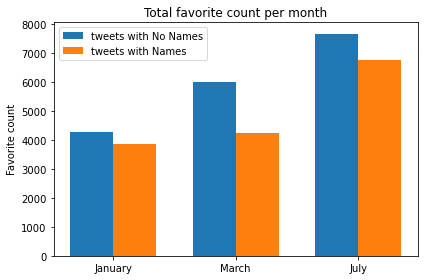

In [349]:
labels = ['January', 'March', 'July']
None_Names = [No_fav_1, No_fav_3, No_fav_7]
Names = [Na_fav_1, Na_fav_3, Na_fav_7]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, None_Names, width, label='tweets with No Names')
rects2 = ax.bar(x + width/2, Names, width, label='tweets with Names')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Favorite count')
ax.set_title('Total favorite count per month')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

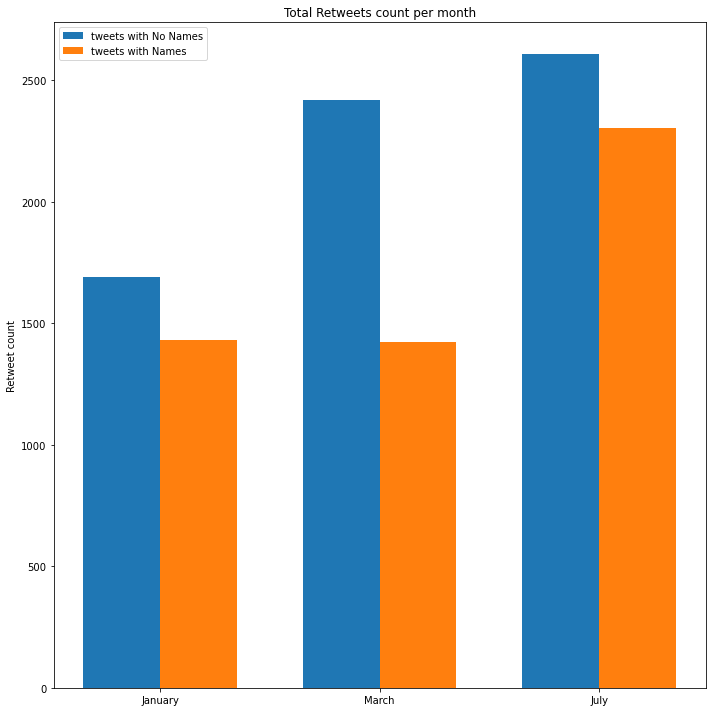

In [350]:
labels = ['January', 'March', 'July']
None_Names = [No_re_1, No_re_3, No_re_7]
Names = [Na_re_1, Na_re_3, Na_re_7]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, None_Names, width, label='tweets with No Names')
rects2 = ax.bar(x + width/2, Names, width, label='tweets with Names')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Retweet count')
ax.set_title('Total Retweets count per month')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

## analysis 2 

In this second analysis we will find out with is the most beloved dog breed , based on both average favorite per post and average rate

In [351]:
dogs=set(clean['dog breed'])
dogs=list(dogs)

In [352]:
av_rate=[]
av_count=[]
for i in dogs:
    av_rate.append(clean.loc[clean['dog breed']==i]['rating_numerator'].mean())
    av_count.append(clean.loc[clean['dog breed']==i]['Favorite count'].mean())

In [353]:
dff=pd.DataFrame({'dog':dogs,'average rate':av_rate,'average favorite count':av_count})

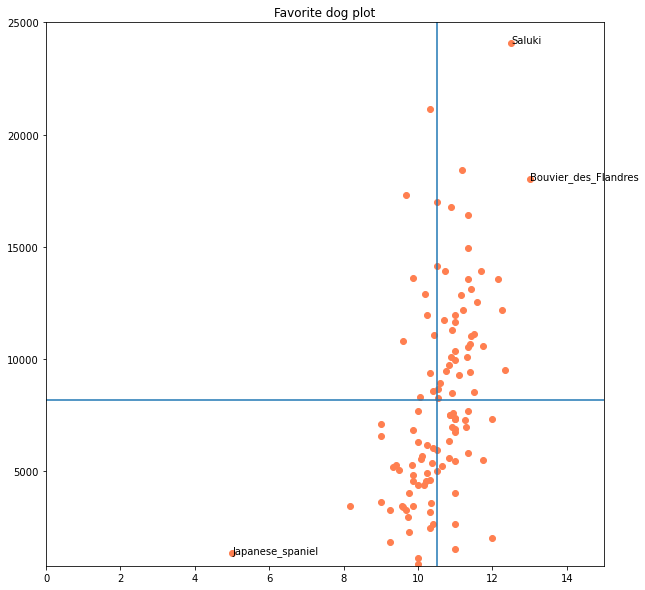

In [354]:
plt.figure()

plt.xlim((0,15))
plt.ylim((800,25000))
plt.axvline(x=10.5)
plt.axhline(y=8167)
plt.title('Favorite dog plot')
plt.scatter(dff['average rate'],dff['average favorite count'],c='coral')
plt.rcParams['figure.figsize'] = [10, 10]
naming=dff.loc[((dff['average rate']>12)&(dff['average favorite count']>15500))|((dff['average rate']<8.5)&(dff['average favorite count']<2000))]
for i in naming['average rate'].index:
    plt.annotate(dff.loc[i,'dog'], (dff.loc[i,'average rate'], dff.loc[i,'average favorite count']))
plt.show()

## Analysis 3 

In this analysis we will compare our data to a study published by "Buffer" on the best time to tweet to maximize exposure

In [355]:
new=clean.copy()
hour=[]
months=[]
years=[]
for i in range(len(new)) :
    months.append(new.loc[i,'timestamp'].month)
    years.append(new.loc[i,'timestamp'].year)
    hour.append(new.loc[i,'timestamp'].hour)
   

In [356]:
new['hour']=hour
new['month']=months
new['year']=years

In [357]:
new.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog type,dog breed,confidence,Favorite count,Retweet,hour,month,year
1767,669567591774625800,2015-11-25 17:25:28,Twitter for iphone,Meet Kollin. He's a Parakeetian Badminton from...,https://twitter.com/dog_rates/status/669567591...,9,10,Kollin,Not classified,Chihuahua,0.980511,248,61,17,11,2015


In [358]:
ret=[]
favi=[]
for i in range(0,25,1):
    x=new.loc[(new['year']==2017)&(new['hour']==i)]['Retweet'].values
    y=new.loc[(new['year']==2017)&(new['hour']==i)]['Favorite count'].values
    if len(x)==0:
        ret.append(0)
    else :
        ret.append(x.mean())
    if len(y)==0:
        favi.append(0)
    else:
        favi.append(y.mean())

In [359]:
clock=pd.DataFrame()
clock['hour']=range(25)
clock['retweet']=ret
clock['favorite']=favi

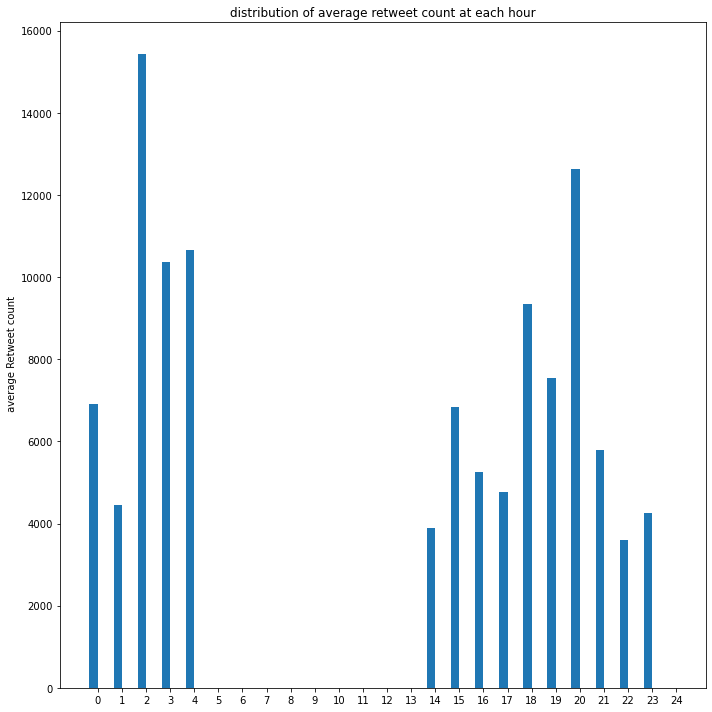

In [360]:
labels = clock['hour']
ret = clock['retweet']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ret, width)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(' average Retweet count')
ax.set_title('distribution of average retweet count at each hour')
ax.set_xticks(x)
ax.set_xticklabels(labels)



fig.tight_layout()
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

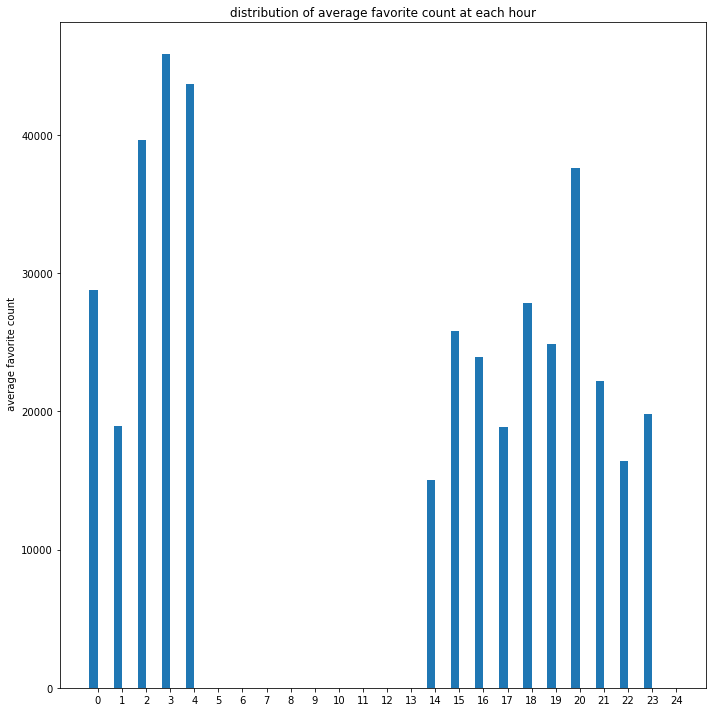

In [361]:
labels = clock['hour']
ret = clock['favorite']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ret, width)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(' average favorite count')
ax.set_title('distribution of average favorite count at each hour')
ax.set_xticks(x)
ax.set_xticklabels(labels)



fig.tight_layout()
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()